# The Weather Data

The weather data was downloaded from [Met Éireann historical data](https://www.met.ie/climate/available-data/historical-data). The data from a number of weather stations was downloaded with the choice of weather station based on their proximity to a wind farm. A number were also selected for the size of the data set. Weather information for Shannon Airport, Dublin Airport and Valentia dates back to the mid-1940's. These larger data sets will be used to analyse weather trends in Ireland.

The Met Éireann weather data used for this analysis was recorded hourly. Measurements such as rainfall (mm), wind speed (knots), wind direction (degrees), relative humidity and temperature (Celsius) are recorded.

As of today, 3rd Jan 20204 Met Éireann have not yet updated the hourly weather data for December 2024. The weather data will be updated as soon as it becomes available.

In [30]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import glob

The glob module was used to create a single dataframe of the weather data in a similar method to the electricity data. For an explanation of glob please see [clean_electricity.ipynb](clean_electricity.ipynb). 

In [31]:
# Check the files 
csv_files = glob.glob('data/weather/*.csv')
csv_files

['data/weather/hly1775Johnstown.csv',
 'data/weather/hly875Mullingar.csv',
 'data/weather/hly532DublinAirport.csv',
 'data/weather/hly1975MtDillon.csv',
 'data/weather/hly1875Athenry.csv',
 'data/weather/hly1475Gurteen.csv',
 'data/weather/hly518ShannonAirport.csv',
 'data/weather/hly2075Finner.csv',
 'data/weather/hly1175Newport.csv',
 'data/weather/hly3904CorkAirport.csv',
 'data/weather/hly2275Valentia.csv',
 'data/weather/hly2375Belmullet.csv']

The weather stations selected for analysis are:

* Athenry, Co. Galway
* Belmullet, Co. Mayo
* Cork Airport, Co. Cork
* Dublin Airport, Dublin
* Finner, Co. Donegal
* Gurteen, Co. Tipperary
* Johnstown Castle, Co. Wexford
* Mount Dillon, Co. Roscommon
* Mullingar, Co. Westmeath
* Newport, Co. Mayo
* Shannon Airport, Co. Clare
* Valentia, Co. Kerry

In [32]:
# Find all csv files in the data/weather
csv_files = glob.glob('data/weather/*.csv')

# Create an empty dataframe to store the combined data
weather_df = pd.DataFrame()

# Loop through each csv file and append contents to weather_df
for csv_file in csv_files:
    for skip_rows in [17, 23]:
        try:
            df = pd.read_csv(csv_file,
                             skiprows= skip_rows,
                             na_values= ' ',
                             index_col= 'date',
                             parse_dates= ['date'],
                             usecols= ['date', 'rhum', 'rain', 'temp', 'msl', 'wdsp', 'wddir'],
                             date_format = "%d-%b-%Y %H:%M"
                             )
        except Exception as e:
            continue
        
        weather_df = pd.concat([weather_df, df], axis= 1)

    weather_df.sort_index(inplace= True)

weather_df.head()

,rain,temp,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,...,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,wdsp,wddir
date,,,,,,,,,,,,,,,,,,,,,
1944-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,1034.3,12.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,1033.9,9.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.0,1033.4,11.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,1032.8,11.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,1032.4,11.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
weather_df.to_csv('data/weather/merged_data/full_weather.csv')

As the energy data dates from 2014 to 2024, the weather data from this time period will be selected for weather and wind energy analysis. 

In [34]:
# Select weather data from 2014.
weather_df = weather_df['2014' :'2024']
weather_df.head()

,rain,temp,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,...,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,wdsp,wddir
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.0,7.6,76.0,992.4,13.0,220.0,0.0,3.4,90.0,989.8,...,80.0,988.7,9.0,180.0,0.0,7.1,80.0,984.0,17.0,210.0
2014-01-01 01:00:00,0.0,6.6,77.0,992.4,11.0,230.0,0.0,3.0,92.0,989.7,...,81.0,987.5,7.0,180.0,0.0,6.4,82.0,983.7,17.0,200.0
2014-01-01 02:00:00,0.0,6.7,83.0,991.7,9.0,210.0,0.0,3.0,92.0,989.1,...,82.0,986.2,9.0,180.0,0.1,7.2,86.0,983.2,15.0,200.0
2014-01-01 03:00:00,0.0,7.5,81.0,991.1,10.0,210.0,0.1,3.0,93.0,988.5,...,88.0,984.4,9.0,180.0,0.1,7.0,85.0,982.5,16.0,190.0
2014-01-01 04:00:00,0.0,8.0,82.0,989.6,11.0,200.0,0.0,2.8,94.0,987.4,...,88.0,981.9,8.0,160.0,1.0,6.6,91.0,981.6,16.0,190.0


In [35]:
weather_df.shape

(95689, 72)

In [36]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95689 entries, 2014-01-01 00:00:00 to 2024-12-01 00:00:00
Freq: h
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    95660 non-null  float64
 1   temp    95661 non-null  float64
 2   rhum    95661 non-null  float64
 3   msl     95661 non-null  float64
 4   wdsp    95655 non-null  float64
 5   wddir   95659 non-null  float64
 6   rain    95679 non-null  float64
 7   temp    95681 non-null  float64
 8   rhum    95681 non-null  float64
 9   msl     95681 non-null  float64
 10  wdsp    95676 non-null  float64
 11  wddir   95679 non-null  float64
 12  rain    95689 non-null  float64
 13  temp    95689 non-null  float64
 14  rhum    95689 non-null  float64
 15  msl     95689 non-null  float64
 16  wdsp    95689 non-null  int64  
 17  wddir   95689 non-null  float64
 18  rain    95648 non-null  float64
 19  temp    95651 non-null  float64
 20  rhum    95644 non-null  float

This large data set has 95689 rows and 72 columns. All the columns have the correct data type of float.

In [37]:
# Count of the number of missing values
weather_df.isna().sum().sum()

np.int64(2022)

In [38]:
# Check for missing values
weather_df.isna().sum()

rain     29
temp     28
rhum     28
msl      28
wdsp     34
         ..
temp      0
rhum      0
msl       0
wdsp      0
wddir     0
Length: 72, dtype: int64

https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values

In [39]:
# Find rows with missing information
null_data = weather_df[weather_df.isnull().any(axis=1)]
null_data

,rain,temp,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,...,rhum,msl,wdsp,wddir,rain,temp,rhum,msl,wdsp,wddir
date,,,,,,,,,,,,,,,,,,,,,
2014-04-10 12:00:00,0.0,11.6,68.0,1022.8,10.0,230.0,0.1,9.4,93.0,1021.5,...,89.0,1023.8,9.0,340.0,0.0,10.5,69.0,1022.0,9.0,290.0
2014-04-10 13:00:00,0.0,11.3,69.0,1022.5,10.0,240.0,0.0,10.4,91.0,1020.9,...,69.0,1023.8,10.0,330.0,0.0,11.0,71.0,1022.1,10.0,280.0
2014-04-10 14:00:00,0.0,11.4,73.0,1022.0,11.0,230.0,1.3,10.3,96.0,1021.0,...,67.0,1024.0,10.0,320.0,0.0,10.9,64.0,1022.4,10.0,280.0
2014-04-10 15:00:00,0.0,10.9,82.0,1021.9,12.0,240.0,0.4,11.8,83.0,1021.2,...,62.0,1024.1,9.0,330.0,0.0,11.1,64.0,1022.5,9.0,270.0
2014-08-26 15:00:00,0.0,16.5,82.0,1008.5,15.0,60.0,0.0,15.5,81.0,1010.8,...,77.0,1007.7,4.0,260.0,0.0,16.7,73.0,1010.5,10.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 06:00:00,0.4,14.4,96.0,1012.3,8.0,190.0,0.0,12.2,89.0,1010.0,...,89.0,1007.7,10.0,170.0,0.0,15.0,89.0,1006.5,11.0,200.0
2024-08-19 07:00:00,0.2,14.8,96.0,1011.4,10.0,180.0,0.0,12.9,90.0,1009.6,...,92.0,1007.0,10.0,160.0,0.3,15.1,89.0,1005.5,14.0,200.0
2024-08-19 08:00:00,0.0,15.3,93.0,1011.2,9.0,190.0,0.0,13.8,88.0,1009.2,...,91.0,1003.6,14.0,160.0,3.8,12.7,86.0,1004.8,17.0,180.0


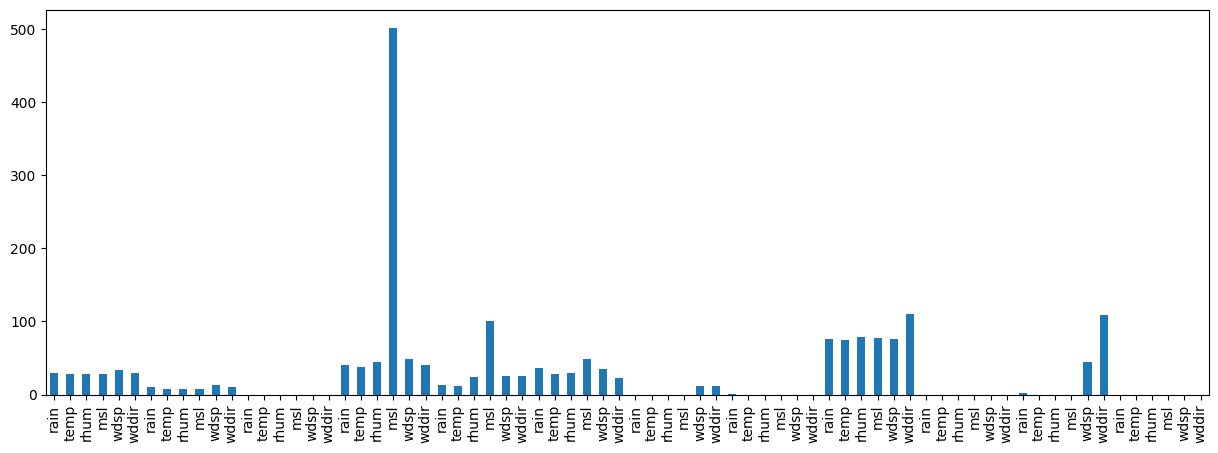

In [40]:
# Plot missing values
fig, ax = plt.subplots(figsize = (15,5))
weather_df.isna().sum().plot(kind= 'bar')
plt.show()

Overall, the number of missing data points, 2022 data points, is low relative to the size of the data set. Only 968 rows have missing data. The missing data will be interpolated rather than dropping the rows with missing data with [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html), or using forward fill or backward fill with [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) to replace the missing data. As the data is taken at hourly intervals, for most situations interpolation should be suitable. Interpolation can be performed with the interpolate() function or fillna(method = 'linear'). This [YouTube video](https://www.youtube.com/watch?v=QXpilXhDsNA) explains linear interpolation in simple terms. Linear interpolation replaces the missing data point between two values, with the 

This [blog](https://llego.dev/posts/filling-missing-values-pandas-fillna-interpolate/) demonstrates the used of fillna() and interpolate(). Linear interpolation is the default method with interpolate(). 

There are no index time points missing. This will simplify the task of merging the weather and wind energy data. 

In [41]:
# Interpolate the missing data
weather_df.interpolate(method = 'linear', inplace= True)

One advantage of excluding the location data when loading the CSV files into pandas is that is simplified the task of calculating the row averages of columns with the same name. If the location of the data was included as part of the column name, grouping the columns by name to calculate countrywide averages would not have been possible. 

[Transpose()](https://www.geeksforgeeks.org/python-pandas-dataframe-transpose/) allows for the conversion of rows into columns and vice versa. The mean of columns with the same name was calculated using [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). The code from [Stackoverflow.com](https://stackoverflow.com/questions/68233237/computing-row-average-of-columns-with-same-name-in-pandas) was used to complete this part of the task. 

In [42]:
# Compute row average for the columns
weather_df_mean = weather_df.T.groupby(weather_df.columns).mean().T.round(2)

In [43]:
# https://pandas.pydata.org/docs/user_guide/basics.html#basics-rename
weather_df_mean.rename({'msl': 'Pressure (hPa)', 
                        'rain': 'Rain (mm)', 
                        'temp': 'Temp (°C)', 
                        'wddir': 'Wind Direction (deg)', 
                        'wdsp': 'Wind Speed (knots)', 
                        'rhum': 'Relative Humidity (%)'}, 
                        axis = 'columns',
                        inplace= True)

In [44]:
# Check the dataframe
weather_df_mean.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75


In [45]:
# Write the cleaned data to CSV file
weather_df_mean.to_csv('data/weather/merged_data/weather_analysis.csv')

How does the mean of the weather compare with the individual weather data? 

In [46]:
# Group by weather_df, the untransposed dataframe by monthly
weather_df_monthly = weather_df.resample('ME').mean()

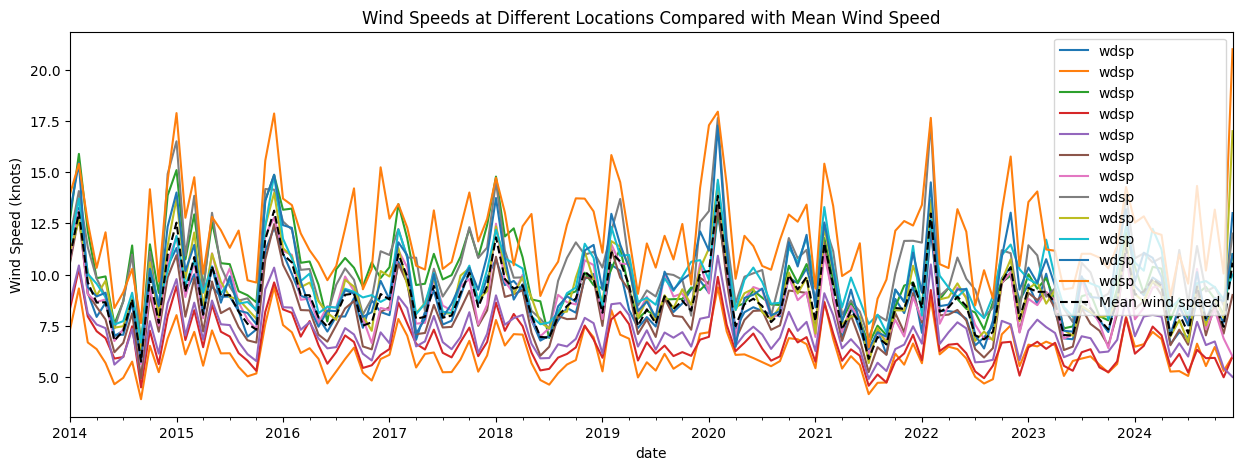

In [47]:
# Plot Wind Speed from full data set vs Mean Wind Speed
weather_df_monthly['wdsp'].plot(figsize= (15,5))

weather_df_mean['Wind Speed (knots)'].resample('ME').mean().plot(color = 'black', linestyle = '--', label = 'Mean wind speed')

plt.title('Wind Speeds at Different Locations Compared with Mean Wind Speed')
plt.ylabel('Wind Speed (knots)')
plt.legend()
plt.show()

This plot is to confirm that the choice of weather stations reflects an accurate mean wind speed. Originally Sherkin Island, Co Cork and Mace Head, Co. Galway were included. However, their wind speeds were significantly higher than the other locations and thus the mean wind speeds was not representative of the bulk of the weather stations. As there are no wind farms close to these locations, there were removed from the weather data set. 

***

End